# Stock Market Analysis for Mexican Stocks

In this project, we'll analyse data from the stock market for some mexican stocks. 

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history. 

Here are the questions we'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behaviour?

In [1]:
# Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# To grab stock data
# from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas_datareader as pdr
from datetime import datetime

#To handle floats in Python 2
# from __future__ import division

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [2]:
# We're going to analyse stock info of ALSEA,AMXL,CEMEXCPO,BOLSAA,BIMBOA, GAPB
mx_list = ['ALSEA.MX','AMXL.MX','CEMEXCPO.MX','BOLSAA.MX','BIMBOA.MX','GAPB.MX']

In [3]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [4]:
#Using Yahoo Finance to grab the stock data
for stock in mx_list:
    globals()[stock.replace('.MX', "")] = web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

Thanks to the globals method, ALSEA.MX's stock data will be stored in the ALSEA global variable dataframe. Let's see if that worked.

In [5]:
## parece que captura la infroamción del momento 17 de abril 2020 11:50
ALSEA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-17,16.990000,14.97,15.00,16.650000,10000031,16.650000
2020-04-20,16.600000,15.91,16.60,16.240000,6078266,16.240000
2020-04-21,16.420000,15.90,16.33,16.190001,2884072,16.190001
2020-04-22,18.389999,16.49,16.49,17.740000,4490757,17.740000
2020-04-23,20.660000,17.73,17.75,20.350000,7910611,20.350000


In [6]:
## parece que captura la infroamción del momento 17 de abril 2020 11:55
ALSEA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-17,16.990000,14.97,15.00,16.650000,10000031,16.650000
2020-04-20,16.600000,15.91,16.60,16.240000,6078266,16.240000
2020-04-21,16.420000,15.90,16.33,16.190001,2884072,16.190001
2020-04-22,18.389999,16.49,16.49,17.740000,4490757,17.740000
2020-04-23,20.660000,17.73,17.75,20.350000,7910611,20.350000


In [7]:
# Basic stats for ALSEA's Stock
ALSEA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,42.201107,40.898537,41.615059,41.495593,2.671895e+06,41.495593
std,9.894213,10.067761,9.941126,10.048572,2.336616e+06,10.048572
min,14.550000,13.900000,14.020000,14.110000,0.000000e+00,14.110000
25%,39.090000,37.880001,38.680000,38.480000,1.191781e+06,38.480000
50%,43.369999,42.139999,42.910000,42.799999,1.749916e+06,42.799999
75%,49.410000,48.169998,48.880001,48.959999,3.378627e+06,48.959999
max,54.830002,53.080002,53.910000,53.669998,1.351740e+07,53.669998


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [8]:
#Some basic info about the dataframe
ALSEA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-23 to 2020-04-23
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


No missing info in the dataframe above, so we can go about our business.

### What's the change in stock's price over time?

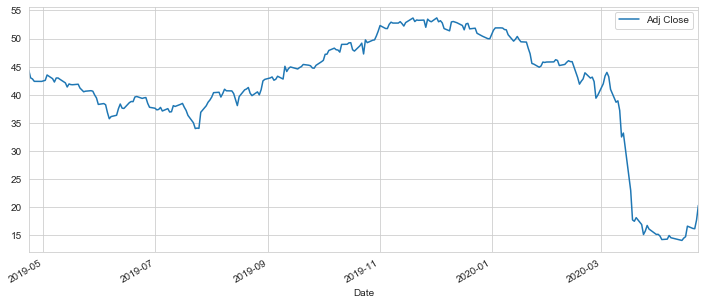

In [9]:
#Plotting the stock's adjusted closing price using pandas
ALSEA['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

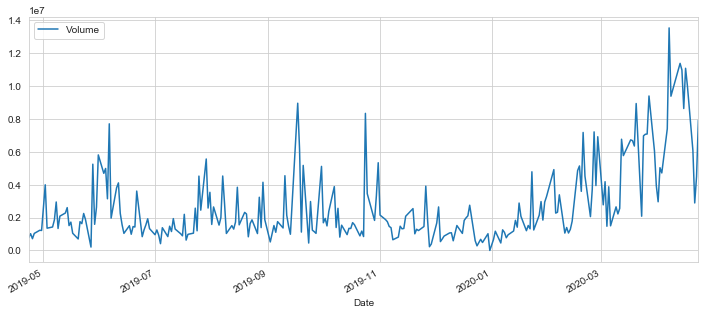

In [10]:
# Plotting the total volume being traded over time
ALSEA['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    ALSEA[column_name] = ALSEA['Adj Close'].rolling(window=ma,center=False).mean()

In [12]:
ALSEA.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-04-17,16.990000,14.97,15.00,16.650000,10000031,16.650000,14.733,15.4800,30.6562
2020-04-20,16.600000,15.91,16.60,16.240000,6078266,16.240000,14.867,15.4160,30.0562
2020-04-21,16.420000,15.90,16.33,16.190001,2884072,16.190001,15.059,15.3175,29.4580
2020-04-22,18.389999,16.49,16.49,17.740000,4490757,17.740000,15.399,15.3575,28.9088
2020-04-23,20.660000,17.73,17.75,20.350000,7910611,20.350000,15.935,15.6170,28.4078


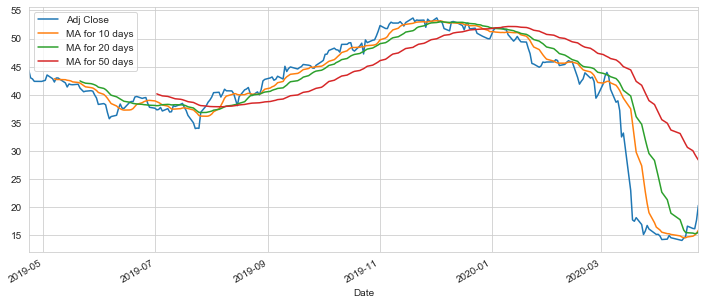

In [13]:
ALSEA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, ALSEA's stock has a dip the start of March, it's generally been stable since 2019 July.

### What was the daily return average of a stock?

In [14]:
#The daily return column can be created by using the percentage change over the adjusted closing price
ALSEA['Daily Return'] = ALSEA['Adj Close'].pct_change()

In [15]:
ALSEA['Daily Return'].tail()

Date
2020-04-17    0.126522
2020-04-20   -0.024625
2020-04-21   -0.003079
2020-04-22    0.095738
2020-04-23    0.147125
Name: Daily Return, dtype: float64

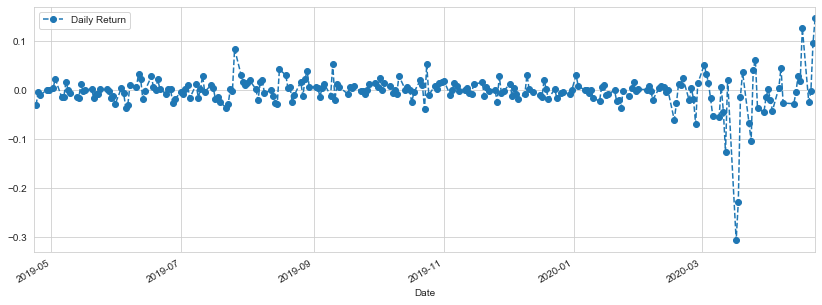

In [16]:
#Plotting the daily return
ALSEA['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

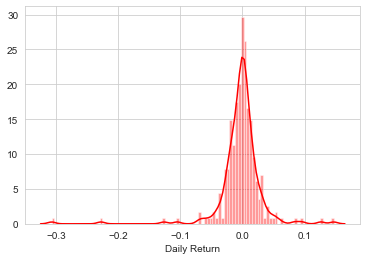

In [17]:
sns.distplot(ALSEA['Daily Return'].dropna(),bins=100,color='red')

0 daily returns seem to be frequent ALSEA.

### What was the correlation between daily returns of different stocks?

In [19]:
#Reading just the 'Adj Close' column this time
close_df = web.DataReader(mx_list,'yahoo',start,end)['Adj Close']

In [20]:
close_df.tail()

Symbols,ALSEA.MX,AMXL.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,GAPB.MX
Date,,,,,,
2020-04-17,16.650000,13.22,33.470001,38.290001,5.05,137.580002
2020-04-20,16.240000,13.14,31.920000,38.660000,4.97,138.369995
2020-04-21,16.190001,13.12,32.380001,38.360001,4.68,133.759995
2020-04-22,17.740000,13.38,32.750000,41.090000,4.69,137.410004
2020-04-23,20.350000,13.33,31.910000,41.439999,4.67,136.470001


Everything works as expected. 

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [21]:
rets_df = close_df.pct_change()

In [22]:
rets_df.tail()

Symbols,ALSEA.MX,AMXL.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,GAPB.MX
Date,,,,,,
2020-04-17,0.126522,0.031201,0.038474,0.010290,0.069915,0.054011
2020-04-20,-0.024625,-0.006051,-0.046310,0.009663,-0.015842,0.005742
2020-04-21,-0.003079,-0.001522,0.014411,-0.007760,-0.058350,-0.033316
2020-04-22,0.095738,0.019817,0.011427,0.071168,0.002137,0.027288
2020-04-23,0.147125,-0.003737,-0.025649,0.008518,-0.004264,-0.006841


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

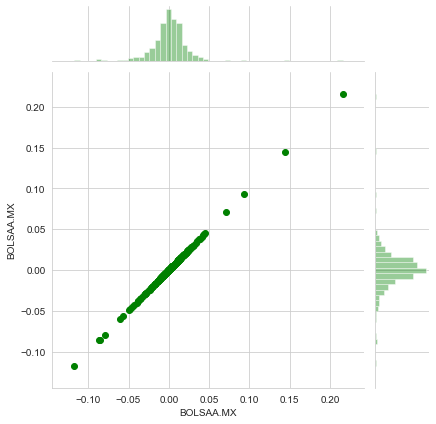

In [23]:
sns.jointplot("BOLSAA.MX","BOLSAA.MX",rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between BOLSAA and ALSEA's daily returns.

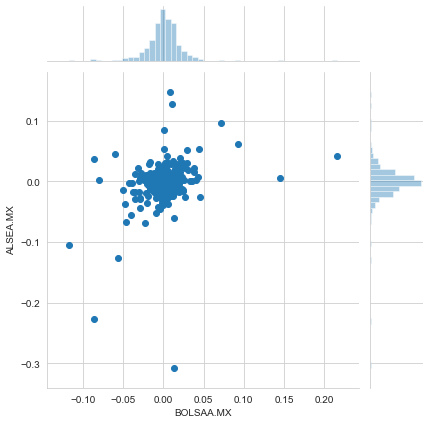

In [24]:
sns.jointplot('BOLSAA.MX','ALSEA.MX',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

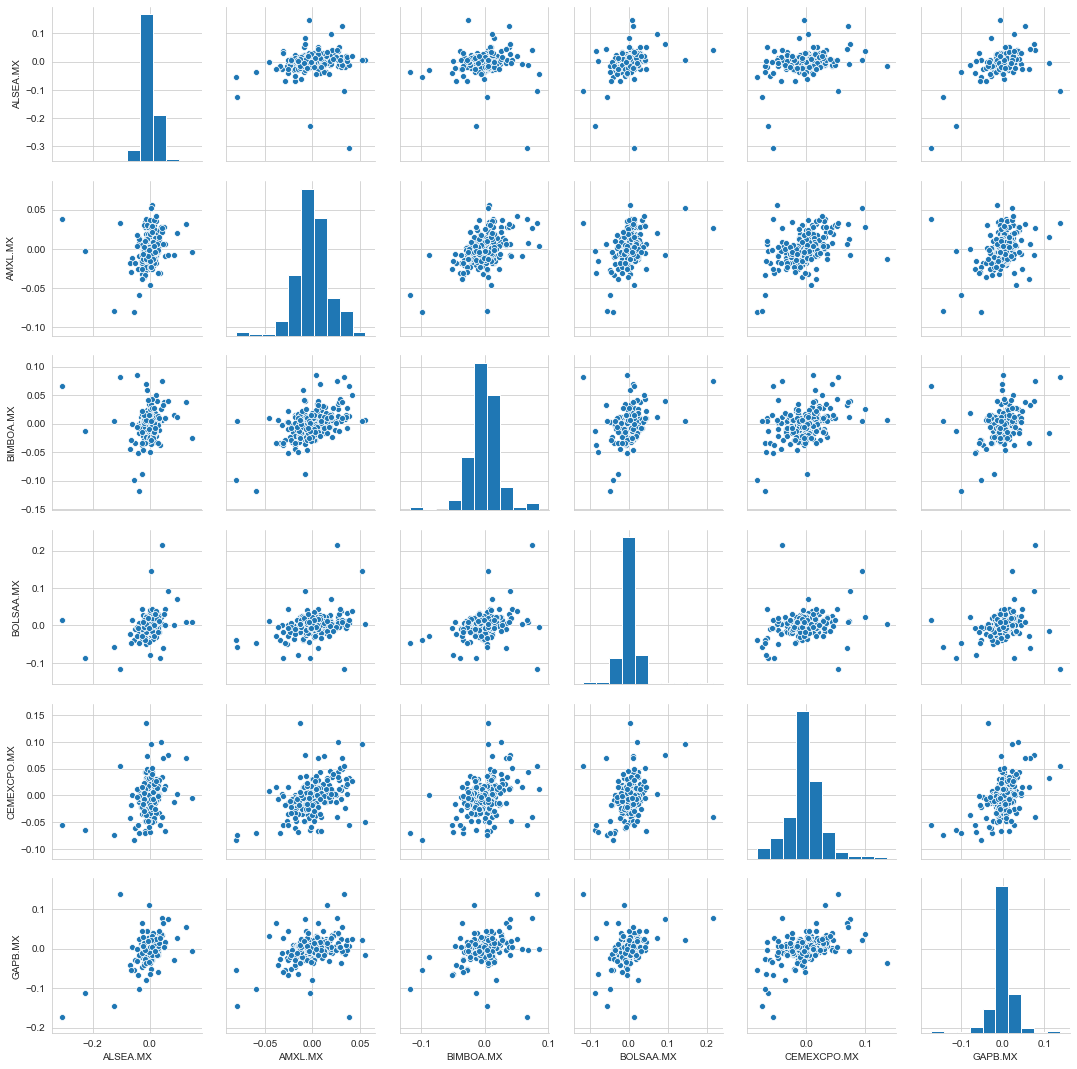

In [25]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

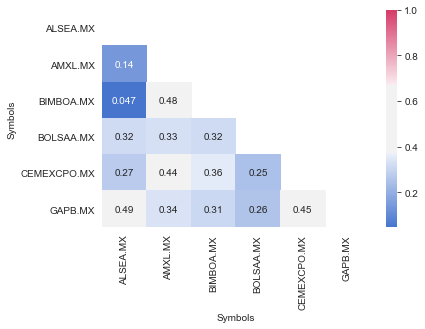

In [29]:
corr = rets_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,cmap =sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

GAP and ALSEA seem to have the highest correlation. 

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [30]:
rets = rets_df.dropna()

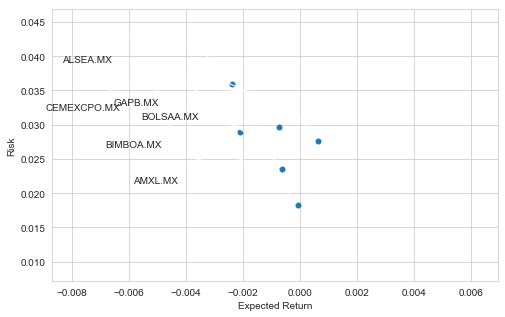

In [31]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


We'd want a stock to have a high expected return and a low risk; AMXL and BIMBOA seem to be the safe options for that. Meanwhile, ALSEA and CEMEX stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

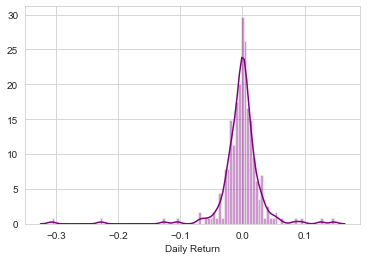

In [32]:
sns.distplot(ALSEA['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for ALSEA's stock looked like the above. And our daily returns dataframe looked like:

In [33]:
rets.head()

Symbols,ALSEA.MX,AMXL.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,GAPB.MX
Date,,,,,,
2019-04-24,-0.030651,0.010324,0.011802,-0.001230,0.014349,0.011970
2019-04-25,-0.004418,0.008856,0.011908,-0.019709,-0.040261,-0.001131
2019-04-26,-0.010042,-0.003376,0.010807,-0.000251,-0.005669,-0.016064
2019-04-29,-0.000236,0.002710,-0.006890,-0.029663,-0.007982,-0.021978
2019-04-30,0.000000,-0.045946,0.010048,0.012694,0.008046,0.031354


In [34]:
#Using Pandas built in qualtile method
rets['ALSEA.MX'].quantile(0.05)

-0.038230065872120605

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

Check out this [link](http://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.


In [35]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['ALSEA.MX']

sigma = rets.std()['ALSEA.MX']

In [36]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of ALSEA stocks. Let's check out the opening value of the stock.

In [37]:
ALSEA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-04-23,44.630001,44.049999,44.250000,44.369999,775964,44.369999,NaN,NaN,NaN,NaN
2019-04-24,44.450001,42.900002,44.360001,43.009998,1017156,43.009998,NaN,NaN,NaN,-0.030651
2019-04-25,43.250000,42.570000,42.980000,42.820000,713089,42.820000,NaN,NaN,NaN,-0.004418
2019-04-26,43.610001,42.099998,42.939999,42.389999,1034327,42.389999,NaN,NaN,NaN,-0.010042
2019-04-29,42.610001,42.099998,42.250000,42.380001,1224652,42.380001,NaN,NaN,NaN,-0.000236


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for ALSEA')

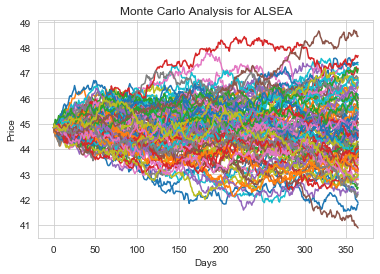

In [38]:
start_price = 44.84 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for ALSEA')

In [39]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for ALSEA Stock after 365 days')

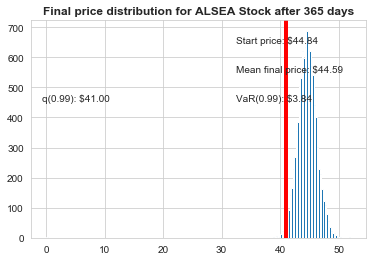

In [40]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for ALSEA Stock after %s days" %days, weight='bold')

We can infer from this that, ALSEA's stock is pretty stable. 
The starting price that we had was 44.84, and the average final price over 10,000 runs was usd 44.53.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD3.69, 99% of the time.